In [0]:
#from google.colab import files

In [0]:
#uploaded = files.upload()

In [0]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [0]:
#Loading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

After loading the data into our variables, we'll have a look at our data.

In [141]:
train.head()

Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]

In [142]:
test.head()

Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0  1461          20       RH  ...    2010        WD        Normal
1  1462          20       RL  ...    2010        WD        Normal
2  1463          60       RL  ...    2010        WD        Normal
3  1464          60       RL  ...    2010        WD        Normal
4  1465         120       RL  ...    2010        WD        Normal

[5 rows x 80 columns]

In [143]:
print(f"The train data has {train.shape[0]} rows and {train.shape[1]} columns.")
print('--------------------')
print(f"The test data has {test.shape[0]} rows and {test.shape[1]} columns.")

The train data has 1460 rows and 81 columns.
--------------------
The test data has 1459 rows and 80 columns.


In [144]:
#Checking if the dataset has any missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Out of 81 features, 19 features have missing values. Let's check the percentage of missing values in these columns.

In [145]:
#missing value counts in each of these columns
miss = train.isnull().sum()/len(train)
miss = miss[miss>0]
miss.sort_values(inplace=True)
miss

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

We can infer that PoolQC has 99.5% values missing followed by MiscFeature, Alley and Fence. Let's plot a bar plot explaining these missing values.

In [0]:
#Visualize missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index



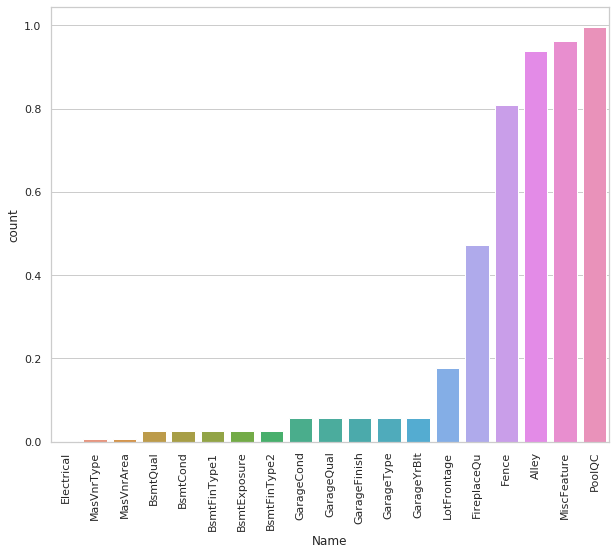

In [147]:
#plot the missing value count
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Name',y='count',data=miss)
plt.xticks(rotation =90)
plt.show()

Checking the distribution of the target variable.

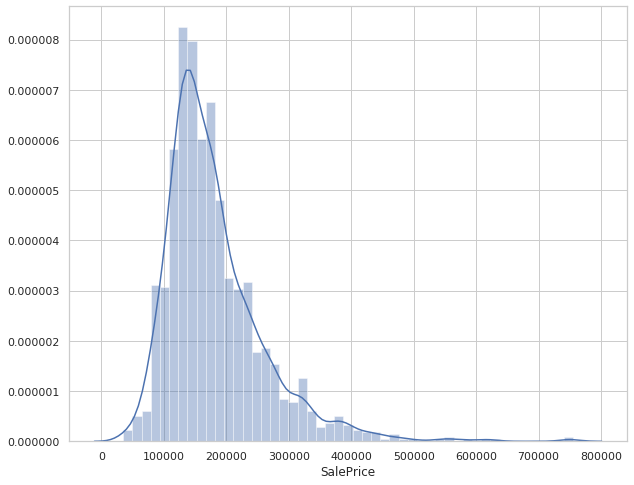

In [148]:
#SalePrice
sns.distplot(train['SalePrice'])

SalePrice is the target variable , has a right-skewed distribution. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. For this, we'll take the log transform of this variable so that it becomes normally distributed. In addition, linear algortihms assume constant variance in the error term.

Alternatively, we can also cofirm this skewed behaviour using skewness metric

In [149]:
#skewness
print('The skewness of SalePrice is {}'.format(train['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


Now taking the log transform of thsi variable and checking it's skewness again i.e if it is any closer to the normal.

In [150]:
#Transforming the target variable
target = np.log(train['SalePrice'])
print('Skewness is ',target.skew())

Skewness is  0.12133506220520406


In [151]:
sns.distplot(target)

Log transformation of the target variable has made it's distribution more normal. As we have 80 variables , visualizing them one by oen wouldn't be adivisable.Instead, we'll look at variables based on their correlation with the target variable.
Also, we'll seperate the numeric and categorical vairables and explore this data in a different angle.

In [152]:
#seperate variables into a new dataframe
numeric_data = train.select_dtypes(include =[np.number])
cat_data = train.select_dtypes(exclude =[np.number])

print(f'There are {len(numeric_data)} numeric and {len(cat_data)} categorical columns in train data.')

There are 1460 numeric and 1460 categorical columns in train data.


In [0]:
del numeric_data['Id']

Checking for the correlation behaviour of the numeric variables. If found, we can later remove these correlated variables as they won't provide any useful information to our model.

In [154]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

Observe the last row of the correlation map. We can see that some variables are strongly correlated with the target variable than others.

Printing numeric correlation score that'll give a better understanding of the situation.

In [155]:
print(corr['SalePrice'].sort_values(ascending=False)[:15],'\n') #Top 15
print('-------------------\n')
print(corr['SalePrice'].sort_values(ascending=False)[-5:],'\n') #Last 5

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

-------------------

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64 



OverallQual is 79% related to SalePrice. OverallQual is the quality of material used in building the house, and people definitely consider it while buying their 'dream house'.

Let's the OverallQual variable in detail.

In [156]:
train['OverallQual'].unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

OverallQual is an index measured on a scale from 1-10. We can treat this as an ordinary variable as inherent order matters.

Checking median sale price of houses wrt OverallQual.

In [0]:
#Checking mean price per quality and plotting it
pivot = train.pivot_table(index='OverallQual',values='SalePrice',aggfunc=np.median)

In [158]:
pivot

SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390

Let's understand the behaviour by plotting the bar graph of this data.

In [159]:
pivot.plot(kind='bar',color='blue')

This behaviour is normal. 
Now let's visualize the next correlated variable GrLivArea and understand it's behaviour.

In [160]:
#GrLivArea plot
sns.jointplot(x=train['GrLivArea'],y = train['SalePrice'])

As one can observe that SalePrice is directly correlated with GrLivArea, although we can spot an outlier for GrLivArea >5000. So we'll remove that as outliers can damage the efficiency of our model.

Now checking out the categorical variables.

In [161]:
cat_data.describe()

MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
count      1460   1460    91     1460  ...    281          54     1460          1460
unique        5      2     2        4  ...      4           4        9             6
top          RL   Pave  Grvl      Reg  ...  MnPrv        Shed       WD        Normal
freq       1151   1454    50      925  ...    157          49     1267          1198

[4 rows x 43 columns]

Checking the median sale price of a house based on SaleCondition(it tells the condition of the sale, though not much info is given about it's categories).

In [162]:
sp_pivot = train.pivot_table(index='SaleCondition',values='SalePrice',aggfunc=np.median)
sp_pivot

SalePrice
SaleCondition           
Abnorml           130000
AdjLand           104000
Alloca            148145
Family            140500
Normal            160000
Partial           244600

In [163]:
sp_pivot.plot(kind='bar',color='magenta')

SaleCondition Partial ha slightly higher mean sale price. But as we don't much info about it, we cannot generate any good insight from the above data.

Now we'll use the ANOVA test to understand the correlation between categorical variables and SalePrice.

In [0]:
cat = [f for f in train.columns if train.dtypes[f]=='object']

In [0]:
def anova(frame):
  anv = pd.DataFrame()
  anv['features'] = cat
  pvals = []
  for c in cat:
    samples = []
    for cls in frame[c].unique():
      s = frame[frame[c]==cls]['SalePrice'].values
      samples.append(s)
    pval = stats.f_oneway(*samples)[1]
    pvals.append(pval)
  anv['pval'] = pvals
  return anv.sort_values('pval')

In [166]:
cat_data['SalePrice'] = train.SalePrice.values
k = anova(cat_data)
k['disparity'] = np.log(1/k['pval'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

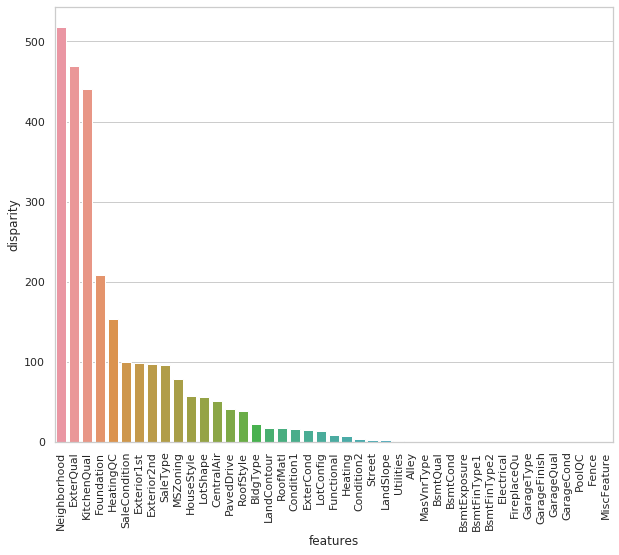

In [167]:
sns.barplot(data=k,x='features',y='disparity')
plt.xticks(rotation =90)


Here can observe the Neighbourhood, f.b ExterQual, KitchenQual are also considered by the people while buying new house.

Plotting Histogram for all numeric values to see if all values are skewed.
For categorical variable we'll create the boxplot.

In [0]:
#create  numeric plots
num = [f for f in train.columns if train.dtypes[f] !='object']
num.remove('Id')

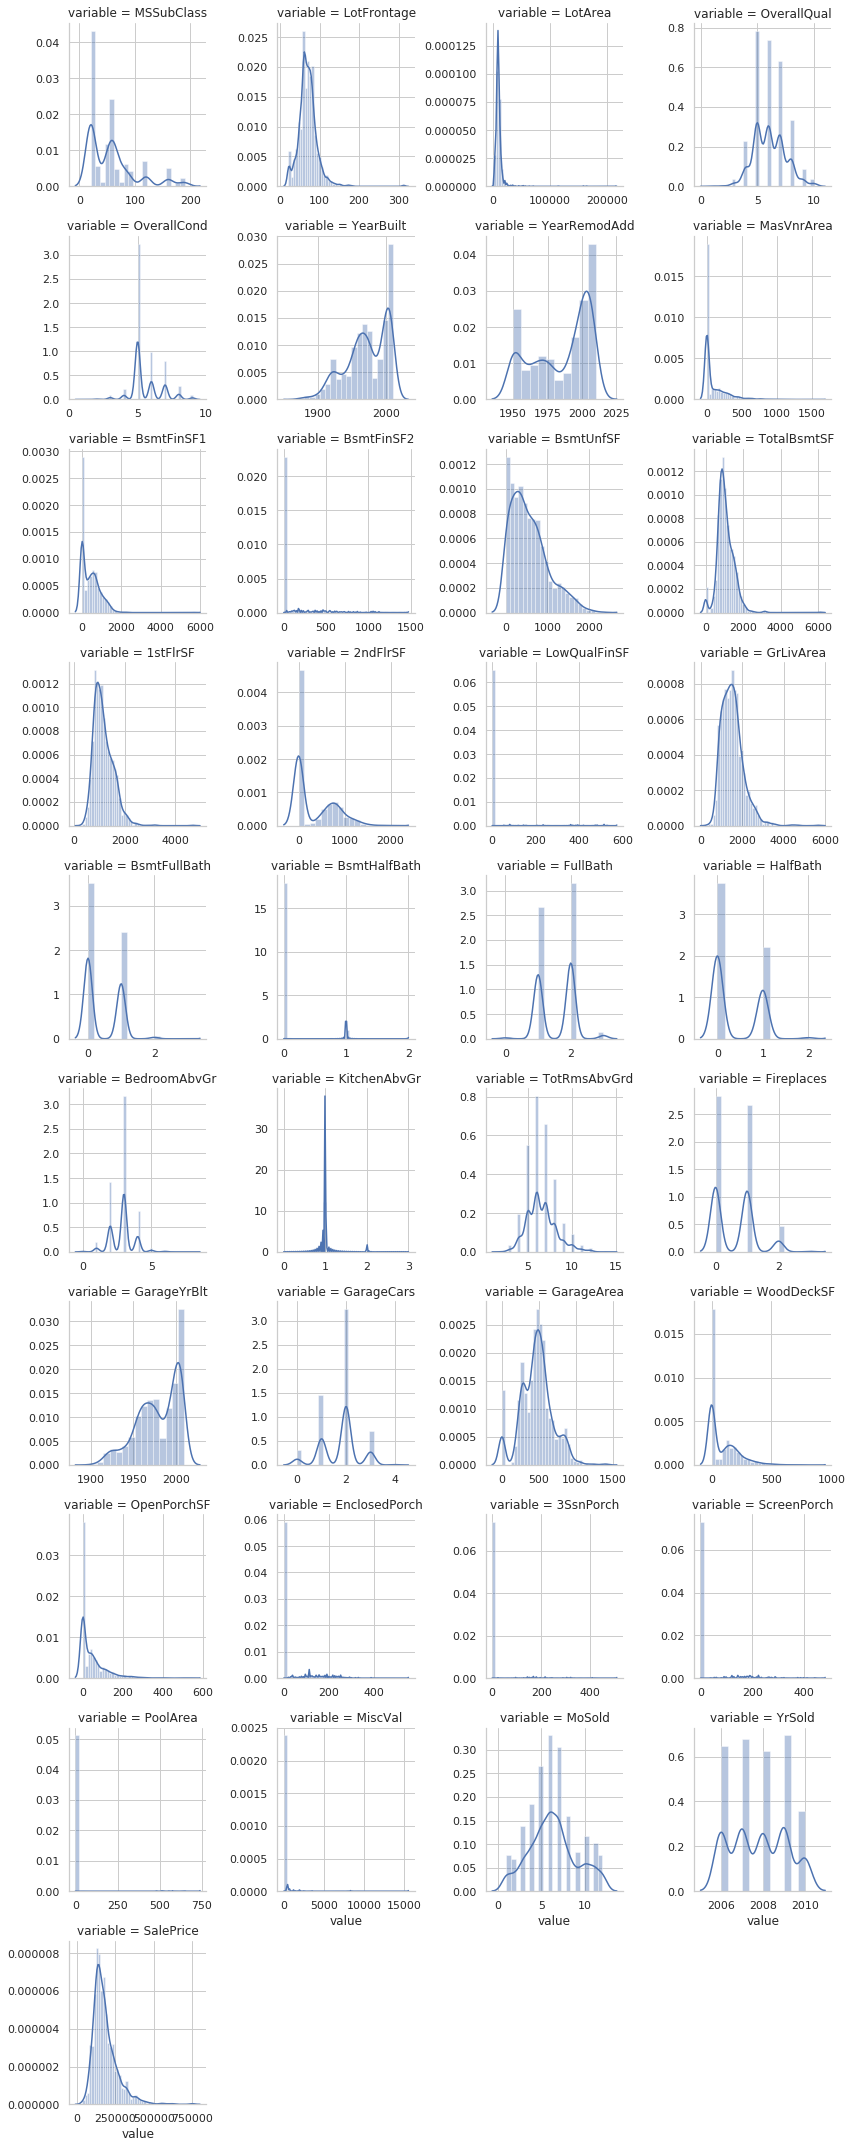

In [169]:
nd = pd.melt(train,value_vars=num)
n1 = sns.FacetGrid(nd,col='variable',col_wrap=4,sharex=False,sharey=False)
n1 = n1.map(sns.distplot,'value')
n1

One can observe that most of the plots are right skewed. We'll transform later.

No we'll create boxplot for the categorical data.

In [0]:
def boxplot(x,y,**kwargs):
  sns.boxplot(x=x,y=y)
  x = plt.xticks(rotation=90)
  

In [0]:
cat = [f for f in train.columns if train.dtypes[f] =='object']

In [172]:
p = pd.melt(train,id_vars='SalePrice',value_vars=cat)
g = sns.FacetGrid(p,col='variable',col_wrap=2,sharex=False,sharey=False,size=5)
g = g.map(boxplot,'value','SalePrice')
g

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:244: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


We can see that most of our variables contain outliers. It'll take us days to clean them up so we'll leave it as it is and let our model deal with it.
Usually tree based algorithms are robust to outliers.

**DATA PREPROCESSING**

Now we'll deal with some outliers, encode variables, impute missing values, and take every possible step to remove inconsistencies from the data set.

In [173]:
#removing outliers
train.drop(train[train['GrLivArea']>4000].index,inplace=True)
train.shape #removed 4 rows

(1456, 81)

In [174]:
stats.mode(test['GarageYrBlt']).mode

array([2005.])

In [0]:
#Correcting row 666
test.loc[666,'GarageQual'] = 'TA' #stats.mode(test['GarageQual']).mode
test.loc[666,'GarageCond'] = 'TA' #stats.mode(test['GarageCond']).mode
test.loc[666,'GarageFinish'] = 'Unf' #stats.mode(test['GarageFinish']).mode
test.loc[666,'GarageYrBlt'] = '1980'    #stats.mode(test['GarageYrBlt']).mode   

In [0]:
#row 1116, mark as missing
test.loc[1116,'GarageType'] = np.nan

Encoding categorical variables.

In [0]:
#importing necessary functions
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
def factorize(data,var,fill_na=None):
  if fill_na is not None:
    data[var].fillna(fill_na,inplace=True)
  le.fit(data[var])
  data[var] = le.transform(data[var])
  return data 

The above function imputes blank levels with mean values which we have input manually.

Now let's impute the missingvalues in LotFrontage variable using median value of LotFrontage by Neighbourhood. Imputation strategies are built during data exploration.
We'll combine the test and train dataset so that we can modify them together.

In [179]:
#Combining the datasets
alldata = train.append(test)
alldata.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(2915, 81)

In [0]:
#Imputing LotFrontage
lot_fr_by_neigh = train['LotFrontage'].groupby(train['Neighborhood'])

for key,group in lot_fr_by_neigh:
  idx =(alldata['Neighborhood']==key) & (alldata['LotFrontage'].isnull())
  alldata.loc[idx,'LotFrontage'] = group.median()




Now we'll impute the missing values in the numerical variables.

In [0]:
alldata['MasVnrArea'].fillna(0,inplace=True)
alldata['BsmtFinSF1'].fillna(0,inplace=True)
alldata['BsmtFinSF2'].fillna(0,inplace=True)
alldata['BsmtUnfSF'].fillna(0,inplace=True)
alldata['TotalBsmtSF'].fillna(0,inplace=True)
alldata['GarageArea'].fillna(0,inplace=True)
alldata["BsmtFullBath"].fillna(0, inplace=True)
alldata["BsmtHalfBath"].fillna(0, inplace=True)
alldata["GarageCars"].fillna(0, inplace=True)
alldata["GarageYrBlt"].fillna(0.0, inplace=True)
alldata["PoolArea"].fillna(0, inplace=True)

Variables having 'qual' in them can be treated as normal variable as discussed above. Now we'll convert the categorical into ordinary variables.

In [0]:
qual_dict ={np.nan:0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])


In [0]:
for i in name:
  alldata[i] = alldata[i].map(qual_dict).astype(int)

alldata['BsmtExposure'] = alldata['BsmtExposure'].map({np.nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

bsmt_fin_dict = {np.nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
alldata['BsmtFinType1'] = alldata['BsmtFinType1'].map(bsmt_fin_dict).astype(int)
alldata['BsmtFinType2'] = alldata['BsmtFinType2'].map(bsmt_fin_dict).astype(int)
alldata['Functional'] = alldata['Functional'].map({np.nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

In [0]:
alldata['GarageFinish'] = alldata['GarageFinish'].map({np.nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)
alldata['Fence'] = alldata['Fence'].map({np.nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

In [0]:
#encoding data
alldata['CentralAir'] = (alldata['CentralAir']=='Y')*1.0
varst = np.array(['MSSubClass','LotConfig','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Foundation','SaleCondition'])


In [0]:
for x in varst:
  factorize(alldata,x)
  

In [0]:
#encoding variables and imputing missing values
alldata = factorize(alldata,'MSZoning','RL')
alldata = factorize(alldata,'Exterior1st','RL')
alldata = factorize(alldata,'Exterior2nd','RL')
alldata = factorize(alldata,'MasVnrType','RL')
alldata = factorize(alldata,'SaleType','RL')

# **Feature Engineering**

In [0]:
#Creating New variables (1 or 0) based on irregular counts
#The level with highest count is kept as 1 and rest 0
alldata['IsRegularLotShape'] = (alldata['LotShape']=='Reg')*1
alldata['IsLandLevel'] = (alldata['LandContour']=='Lvl')*1
alldata['IsLandSlopeGentle'] = (alldata['LandSlope']=='Gtl')*1
alldata['IsElectricalSBrkr'] = (alldata['Electrical']=='SBrkr')*1
alldata['IsGarageDetached'] = (alldata['GarageType']=='Detchd')*1
alldata['IsPavedDrive'] = (alldata['PavedDrive']=='Y')*1
alldata['hasShed'] = (alldata['MiscFeature']=='Shed')*1
alldata['Remodeled'] = (alldata['YearRemodAdd']!=alldata['YearBuilt'])*1

In [0]:
#Modeling during Sale year
alldata['RecentRemodel'] = (alldata['YearRemodAdd']==alldata['YrSold'])*1

In [0]:
#Was this house sold in the year it was built
alldata["VeryNewHouse"] = (alldata["YearBuilt"] == alldata["YrSold"]) * 1
alldata["Has2ndFloor"] = (alldata["2ndFlrSF"] == 0) * 1
alldata["HasMasVnr"] = (alldata["MasVnrArea"] == 0) * 1
alldata["HasWoodDeck"] = (alldata["WoodDeckSF"] == 0) * 1
alldata["HasOpenPorch"] = (alldata["OpenPorchSF"] == 0) * 1
alldata["HasEnclosedPorch"] = (alldata["EnclosedPorch"] == 0) * 1
alldata["Has3SsnPorch"] = (alldata["3SsnPorch"] == 0) * 1
alldata["HasScreenPorch"] = (alldata["ScreenPorch"] == 0) * 1

In [0]:
#setting levels with high count as 1 and the rest as 0
#you can check for them using the value_counts function
alldata["HighSeason"] = alldata["MoSold"].replace({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})
alldata["NewerDwelling"] = alldata["MSSubClass"].replace({20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})

In [192]:
alldata.shape

(2915, 100)

Now we have added 19 more features to our data.

Let's create some more features.

In [193]:
#We'll create alldata2 and use this as a reference
alldata2 = train.append(test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [0]:
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

In [0]:
#House ready before the sale or not
#alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})

In [0]:
#alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

We've several categories like Garage associated with the area of the property. An useful variable would be the sum of all these areas.

In [0]:
#Calculating total area
area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
             'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]

alldata["TotalArea"] = alldata[area_cols].sum(axis=1)
alldata["TotalArea1st2nd"] = alldata["1stFlrSF"] + alldata["2ndFlrSF"]


In [0]:
#Age of house (2010 data)
alldata["Age"] = 2010 - alldata["YearBuilt"]

In [0]:
alldata["TimeSinceSold"] = 2010 - alldata["YrSold"]

In [0]:
#Season
alldata["SeasonSold"] = alldata["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)

In [0]:
alldata["YearsSinceRemodel"] = alldata["YrSold"] - alldata["YearRemodAdd"]

In [0]:
#Simplifying existing features into good/average/bad based on number of counts
alldata["SimplOverallQual"] = alldata.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplOverallCond"] = alldata.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
alldata["SimplPoolQC"] = alldata.PoolQC.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2})
alldata["SimplGarageCond"] = alldata.GarageCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplGarageQual"] = alldata.GarageQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
#alldata["SimplFireplaceQu"] = alldata.FireplaceQu.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplFunctional"] = alldata.Functional.replace({1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
alldata["SimplKitchenQual"] = alldata.KitchenQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplHeatingQC"] = alldata.HeatingQC.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtFinType1"] = alldata.BsmtFinType1.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtFinType2"] = alldata.BsmtFinType2.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
alldata["SimplBsmtCond"] = alldata.BsmtCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplBsmtQual"] = alldata.BsmtQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterCond"] = alldata.ExterCond.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
alldata["SimplExterQual"] = alldata.ExterQual.replace({1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})

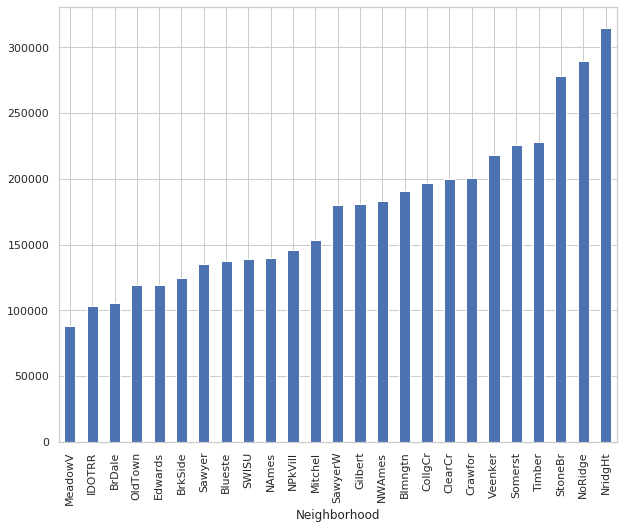

In [203]:
#Group neighborhood variables based on the following variables
train['SalePrice'].groupby(train['Neighborhood']).median().sort_values().plot(kind='bar')

Using hints from the above graph , we'll combine levels of neighborhood variable into fewer levels.

In [0]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1, "Blueste" : 1,
                    "SWISU" : 2, "NAmes" : 2, "NPkVill" : 2, "Mitchel" : 2, "SawyerW" : 2, "Gilbert" : 2, "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2,
                    "ClearCr" : 3, "Crawfor" : 3, "Veenker" : 3, "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}


In [0]:
alldata['NeighborhoodBin'] = alldata2['Neighborhood'].map(neighborhood_map)
alldata.loc[alldata2.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
alldata.loc[alldata2.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
alldata["Neighborhood_Good"].fillna(0, inplace=True)
alldata["SaleCondition_PriceDown"] = alldata2.SaleCondition.replace({'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

In [0]:
#House ready before sale or not
alldata["BoughtOffPlan"] = alldata2.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
alldata["BadHeating"] = alldata2.HeatingQC.replace({'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

In [207]:
alldata.shape

(2915, 126)

Now we've many new features.
Let's split the data into train and test set.

In [0]:
#Splitting data
train_new = alldata[alldata['SalePrice'].notnull()]
test_new = alldata[alldata['SalePrice'].isnull()]

In [209]:
print ('Train', train_new.shape)
print ('--------------------')
print ('Test', test_new.shape)

Train (1456, 126)
--------------------
Test (1459, 126)


Now is the time to transform numeric features and remove it's skewness.

In [0]:
#Getting numeric features
numeric_features = [f for f in train_new.columns if train_new[f].dtype !='object']

In [0]:
#Transforming using log(1+x)
from scipy.stats import skew


In [212]:
skewed = train_new[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed>0.75]
skewed = skewed.index
train_new[skewed] = np.log1p(train_new[skewed])
test_new[skewed] = np.log1p(test_new[skewed])


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
del test_new['SalePrice']

Standardizing Numeric features.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(train_new[numeric_features])
scaled = scaler.transform(train_new[numeric_features])

In [216]:
for i,col in enumerate(numeric_features):
  train_new[col] = scaled[:,i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [217]:
numeric_features.remove('SalePrice')
scaled = scaler.fit_transform(test_new[numeric_features])

for i, col in enumerate(numeric_features):
  test_new[col] = scaled[:,i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Time to OneHotEncode categorical variables.

In [0]:
def onehot(onehot_df,df,column_name,fill_na):
  onehot_df[column_name] =df[column_name]
  if fill_na is not None:
    onehot_df.fillna(fill_na,inplace=True)

  dummies = pd.get_dummies(onehot_df[column_name],prefix ='_'+column_name)
  onehot_df = onehot_df.join(dummies)
  onehot_df = onehot_df.drop([column_name],axis=1)
  return onehot_df


In [0]:
def munge_onehot(df):
       onehot_df = pd.DataFrame(index = df.index)

       onehot_df = onehot(onehot_df, df, "MSSubClass", None)
       onehot_df = onehot(onehot_df, df, "MSZoning", "RL")
       onehot_df = onehot(onehot_df, df, "LotConfig", None)
       onehot_df = onehot(onehot_df, df, "Neighborhood", None)
       onehot_df = onehot(onehot_df, df, "Condition1", None)
       onehot_df = onehot(onehot_df, df, "BldgType", None)
       onehot_df = onehot(onehot_df, df, "HouseStyle", None)
       onehot_df = onehot(onehot_df, df, "RoofStyle", None)
       onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd")
       onehot_df = onehot(onehot_df, df, "Foundation", None)
       onehot_df = onehot(onehot_df, df, "SaleType", "WD")
       onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal")

       #Fill in missing MasVnrType for rows that do have a MasVnrArea.
       temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
       idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
       temp_df.loc[idx, "MasVnrType"] = "BrkFace"
       onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None")

       onehot_df = onehot(onehot_df, df, "LotShape", None)
       onehot_df = onehot(onehot_df, df, "LandContour", None)
       onehot_df = onehot(onehot_df, df, "LandSlope", None)
       onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr")
       onehot_df = onehot(onehot_df, df, "GarageType", "None")
       onehot_df = onehot(onehot_df, df, "PavedDrive", None)
       onehot_df = onehot(onehot_df, df, "MiscFeature", "None")
       onehot_df = onehot(onehot_df, df, "Street", None)
       onehot_df = onehot(onehot_df, df, "Alley", "None")
       onehot_df = onehot(onehot_df, df, "Condition2", None)
       onehot_df = onehot(onehot_df, df, "RoofMatl", None)
       onehot_df = onehot(onehot_df, df, "Heating", None)

       # we'll have these as numerical variables too
       onehot_df = onehot(onehot_df, df, "ExterQual", "None")
       onehot_df = onehot(onehot_df, df, "ExterCond", "None")
       onehot_df = onehot(onehot_df, df, "BsmtQual", "None")
       onehot_df = onehot(onehot_df, df, "BsmtCond", "None")
       onehot_df = onehot(onehot_df, df, "HeatingQC", "None")
       onehot_df = onehot(onehot_df, df, "KitchenQual", "TA")
       onehot_df = onehot(onehot_df, df, "FireplaceQu", "None")
       onehot_df = onehot(onehot_df, df, "GarageQual", "None")
       onehot_df = onehot(onehot_df, df, "GarageCond", "None")
       onehot_df = onehot(onehot_df, df, "PoolQC", "None")
       onehot_df = onehot(onehot_df, df, "BsmtExposure", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None")
       onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None")
       onehot_df = onehot(onehot_df, df, "Functional", "Typ")
       onehot_df = onehot(onehot_df, df, "GarageFinish", "None")
       onehot_df = onehot(onehot_df, df, "Fence", "None")
       onehot_df = onehot(onehot_df, df, "MoSold", None)

       # Divide  the years between 1871 and 2010 into slices of 20 years
       year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20))  for i in range(0, 7))
       yearbin_df = pd.DataFrame(index = df.index)
       yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
       yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)
       yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
       yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)

       onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None)
       onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None)
       return onehot_df

In [0]:
#Creating OneHot features
onehot_df = munge_onehot(train)

In [0]:
neighborhood_train = pd.DataFrame(index=train_new.shape)
neighborhood_train['NeighborhoodBin'] = train_new['NeighborhoodBin']
neighborhood_test = pd.DataFrame(index=test_new.shape)
neighborhood_test['NeighborhoodBin'] = test_new['NeighborhoodBin']

onehot_df = onehot(onehot_df, neighborhood_train, 'NeighborhoodBin', None)

In [222]:
train_new.shape

(1456, 126)

In [223]:
onehot_df.shape

(1456, 307)

In [224]:
#Adding one-hot variables in our train data set.
train_new = train_new.join(onehot_df) 
train_new.shape

(1456, 433)

Now we have 433 columns!!!

Let's the same for the test data.

In [225]:
#Creating OneHot features for test data
onehot_df_te = munge_onehot(test)
onehot_df_te = onehot(onehot_df_te, neighborhood_test, "NeighborhoodBin", None)
test_new = test_new.join(onehot_df_te)
test_new.shape

(1459, 417)

Difference in number of columns is due the fact that some of the features are not available in the test set. We'll remove those columns from train set to make number of columns equal.

In [226]:
train_new.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       '_YearBuiltBin_YearBin3', '_YearBuiltBin_YearBin4',
       '_YearBuiltBin_YearBin5', '_YearBuiltBin_YearBin6',
       '_YearBuiltBin_YearBin7', '_YearRemodAddBin_YearBin4',
       '_YearRemodAddBin_YearBin5', '_YearRemodAddBin_YearBin6',
       '_YearRemodAddBin_YearBin7', '_NeighborhoodBin_-0.04760808471778121'],
      dtype='object', length=433)

In [227]:
#dropping columns from train set
drop_cols = ["_Exterior1st_ImStucc", "_Exterior1st_Stone","_Exterior2nd_Other","_HouseStyle_2.5Fin","_RoofMatl_Membran", "_RoofMatl_Metal",
             "_RoofMatl_Roll", "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn", "_Heating_Floor", "_Heating_OthW", "_Electrical_Mix",
             "_MiscFeature_TenC", "_GarageQual_Ex",  "_PoolQC_Fa"]
train_new.drop(drop_cols, axis=1, inplace=True)
train_new.shape

(1456, 417)

Removing moree columns.
One's which has huge number of zeros, or secondly features which are not present in both sets.

In [0]:
#removing one column missing from train data
#test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

# Dropping these columns
drop_cols = ["_Condition2_PosN", # only two are not zero
         "_MSZoning_C (all)",
         "_MSSubClass_160"]

train_new.drop(drop_cols, axis=1, inplace=True)
test_new.drop(drop_cols, axis=1, inplace=True)

In [0]:
test_new.drop(["_MSSubClass_150"], axis=1, inplace=True)

Transforming target variable and storing it in new array.

In [230]:
#Creating a label set
label_df = pd.DataFrame(index = train_new.index, columns = ['SalePrice'])
label_df['SalePrice'] = np.log(train['SalePrice'])
print("Training set size:", train_new.shape)
print("Test set size:", test_new.shape)

Training set size: (1456, 414)
Test set size: (1459, 413)


## **Model Training and Evaluation**

Our data is now ready. 
Let's starting training our models.
We'll use 3 algorithms
 
1) XGBoost
2) Nueral Network
3) Lasso Regression

In [0]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

#regr.fit(train_new, label_df)

One can experiment with these hyperparameters.

In [0]:
num = ['Alley', 'Condition2', 'Electrical', 'GarageType', 'GarageYrBlt', 'Heating', 'LandContour', 'LandSlope', 'LotShape',
       'MiscFeature', 'PavedDrive', 'RoofMatl', 'Street', 'Utilities']
      

train_new = train_new.drop(num,axis =1)

In [0]:
test_new = test_new.drop(num,axis=1)

In [0]:
train_new['_NeighnorhoodBin']= train_new['_NeighborhoodBin_-0.04760808471778121']
train_new = train_new.drop(['_NeighborhoodBin_-0.04760808471778121'],axis=1)

In [0]:
test_new['_NeighnorhoodBin']= test_new['_NeighborhoodBin_-1.0875767879360991']
test_new = test_new.drop(['_NeighborhoodBin_-1.0875767879360991'],axis=1)

In [0]:
X2 = train_new.drop(['SalePrice'],axis=1)

In [237]:
regr.fit(X2, label_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1.5, missing=None, n_estimators=7200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.9, reg_lambda=0.6, scale_pos_weight=1, seed=42,
             silent=1, subsample=0.2, verbosity=1)

Creating a RMSE function to evaluate the model's performance.

In [0]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [0]:
#Checking our predictions
y_pred = regr.predict(X2)

In [0]:
y_test = label_df

In [241]:
print("XGBoost score on training set: ", rmse(y_test, y_pred))

XGBoost score on training set:  0.03760524250311031


In [0]:
y_pred_xgb = regr.predict(test_new)

In [0]:
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': np.exp(y_pred_xgb)})
pred1.to_csv('xgbnono.csv', header=True, index=False)

In [0]:
#from google.colab import files
#files.download("xgbnono.csv")

In [0]:
from sklearn.linear_model import Lasso

In [0]:
#Alpha
alpha = 0.00099
#Can play around with this hyperparameter, found this to be the best one.

In [248]:
regr = Lasso(alpha=alpha,max_iter = 50000)
regr.fit(X2,label_df)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [249]:
# run prediction on the training set to get a rough idea of how well it does
y_pred = regr.predict(X2)
y_test = label_df
print("Lasso score on training set: ", rmse(y_test, y_pred))

Lasso score on training set:  0.10173109005352592


In [0]:
#make prediction on the test set
y_pred_lasso = regr.predict(test_new)
lasso_ex = np.exp(y_pred_lasso)
pred1 = pd.DataFrame({'Id': test['Id'], 'SalePrice': lasso_ex})
pred1.to_csv('lasso_model.csv', header=True, index=False)

In [0]:
#from google.colab import files
#files.download("lasso_model.csv")

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler

In [0]:
np.random.seed(10)

#create Model
#define base model
def base_model():
     model = Sequential()
     model.add(Dense(20, input_dim=399, init='normal', activation='relu'))
     model.add(Dense(10, init='normal', activation='relu'))
     model.add(Dense(1, init='normal'))
     model.compile(loss='mean_squared_error', optimizer = 'adam')
     return model

seed = 7
np.random.seed(seed)

In [0]:
scale = StandardScaler()
X_train = scale.fit_transform(X2)
X_test = scale.fit_transform(test_new)


In [255]:
keras_label = label_df.as_matrix()
clf = KerasRegressor(build_fn=base_model, nb_epoch=1000, batch_size=5,verbose=0)
clf.fit(X_train,keras_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=399, activation="relu", kernel_initializer="normal")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="normal")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal")`
  if __name__ == '__main__':


In [0]:
#make predictions and create the submission file 
kpred = clf.predict(X_test) 
kpred = np.exp(kpred)
pred_df = pd.DataFrame(kpred, index=test["Id"], columns=["SalePrice"]) 
pred_df.to_csv('keras1.csv', header=True, index_label='Id')

In [0]:
#from google.colab import files
#files.download("keras1.csv")

In [0]:
#simple average
y_pred = (y_pred_xgb + y_pred_lasso) / 2
y_pred = np.exp(y_pred)
pred_df = pd.DataFrame(y_pred, index=test["Id"], columns=["SalePrice"])
pred_df.to_csv('ensemble1.csv', header=True, index_label='Id')

In [0]:
#from google.colab import files
#files.download("ensemble1.csv")